In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
dataset = datasets.load_digits()
from sklearn.model_selection import train_test_split
X = dataset.data      # features
y = dataset.target    # labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

keys: ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']
data shape: (1797, 64)
images shape: (1797, 8, 8)
target shape: (1797,)
target names: [0 1 2 3 4 5 6 7 8 9]

Description (first 200 chars):
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attribut


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


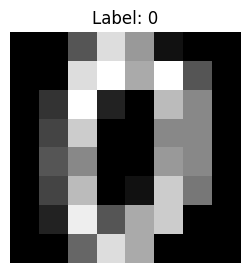

In [24]:
print('keys:', list(dataset.keys()))
print('data shape:', dataset.data.shape)
print('images shape:', dataset.images.shape)
print('target shape:', dataset.target.shape)
print('target names:', getattr(dataset, 'target_names', None))
print('\nDescription (first 200 chars):')
print(dataset.DESCR[:200])

# Show the first image and its label
plt.figure(figsize=(3,3))
plt.imshow(dataset.images[0], cmap='gray')
plt.title(f'Label: {dataset.target[0]}')
plt.axis('off')

# DataFrame preview
df = pd.DataFrame(dataset.data)
df['target'] = dataset.target
df.head()

In [29]:
models = {}   
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    # create an SVM with the i-th kernel
    models[i] = SVC(kernel=kernels[i])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    print(f'Accuracy with {kernels[name]} kernel: {acc:.4f}')

Accuracy with linear kernel: 0.9778
Accuracy with poly kernel: 0.9917
Accuracy with rbf kernel: 0.9861
Accuracy with sigmoid kernel: 0.9000


In [36]:

print("\nOptimized accuracies (with expanded GridSearchCV, 10-fold CV):")

for kernel in kernels:
    # Define hyperparameter grid for each kernel
    if kernel == 'linear':
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    elif kernel == 'poly':
        param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'degree': [2, 3, 4, 5],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
    elif kernel == 'rbf':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 0.001, 0.01, 0.1, 1]
        }
    elif kernel == 'sigmoid':
        param_grid = {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 0.001, 0.01, 0.1, 1]
        }
    
    # Grid search with 10-fold CV
    grid = GridSearchCV(SVC(kernel=kernel), param_grid, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"\nKernel: {kernel}")
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Training accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")



Optimized accuracies (with expanded GridSearchCV, 10-fold CV):

Kernel: linear
Best hyperparameters: {'C': 0.1}
Training accuracy: 1.0000
Test accuracy: 0.9778

Kernel: poly
Best hyperparameters: {'C': 1, 'degree': 3, 'gamma': 'scale'}
Training accuracy: 0.9979
Test accuracy: 0.9917

Kernel: rbf
Best hyperparameters: {'C': 10, 'gamma': 'scale'}
Training accuracy: 1.0000
Test accuracy: 0.9861

Kernel: sigmoid
Best hyperparameters: {'C': 1, 'gamma': 'scale'}
Training accuracy: 0.9068
Test accuracy: 0.9000


Custom kernel (center-weighted) Training accuracy: 1.0000
Custom kernel (center-weighted) Test accuracy: 0.9750


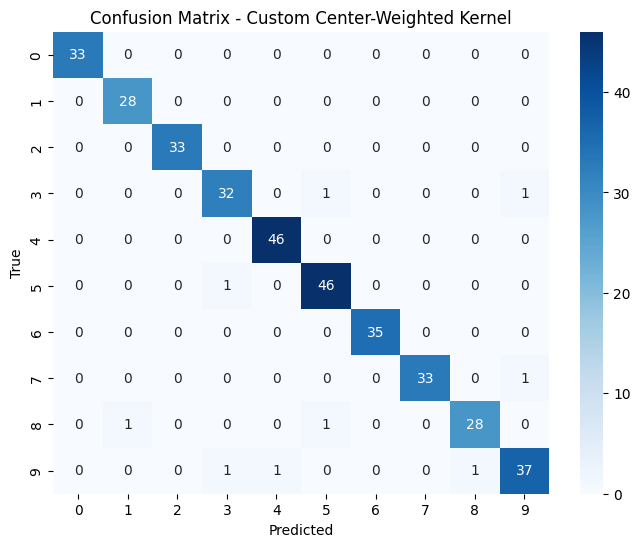

In [ ]:


# -------------------------
# Load digits dataset
# -------------------------
digits = datasets.load_digits()
X = digits.data      # shape (1797, 64)
y = digits.target

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# -------------------------
# Custom kernel: weight central pixels more
# -------------------------
def custom_kernel(X, Y):
    """
    K(X, Y) = X M Y.T
    M is diagonal, central pixels weighted higher
    """
    # Create weight vector: central pixels get 2x weight
    # Pixels are in 8x8 grid; center indices roughly 27-36
    weights = np.ones(X.shape[1])
    center_indices = [27,28,35,36,26,29,34,37]  # approximate center 3x3 block
    for i in center_indices:
        weights[i] = 2.0
    M = np.diag(weights)
    return X @ M @ Y.T

# -------------------------
# Train SVM with custom kernel
# -------------------------
model = SVC(kernel=custom_kernel, C=10)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Custom kernel (center-weighted) Training accuracy: {train_acc:.4f}")
print(f"Custom kernel (center-weighted) Test accuracy: {test_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Custom Center-Weighted Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
